In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import math
%matplotlib inline 


In [78]:
df = pd.read_csv(r'D:\Computer Intelligence\train.csv')
df_backup = df
df

,id,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active,label
0,1,21306,Female,160,58,130.0,90.0,normal,normal,No,No,No,1
1,2,20497,Female,165,71,110.0,70.0,normal,normal,No,No,No,0
2,3,23394,Male,160,90,150.0,90.0,normal,normal,No,No,Yes,1
3,4,22070,Male,156,80,140.0,NaN,normal,normal,Yes,Yes,Yes,1
4,5,17681,Male,167,65,NaN,80.0,normal,good,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,21940,Female,152,66,80.0,60.0,normal,good,No,No,Yes,0
59996,59997,16060,Male,162,73,110.0,80.0,normal,normal,No,No,Yes,0
59997,59998,21030,Female,163,103,160.0,90.0,normal,good,No,No,Yes,1
59998,59999,16097,Female,164,97,110.0,70.0,normal,normal,No,No,Yes,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60000 non-null  int64  
 1   age          60000 non-null  int64  
 2   gender       60000 non-null  object 
 3   height       60000 non-null  int64  
 4   weight       60000 non-null  int64  
 5   bp_hi        54054 non-null  float64
 6   bp_lo        54006 non-null  float64
 7   cholesterol  60000 non-null  object 
 8   glucose      60000 non-null  object 
 9   smoke        60000 non-null  object 
 10  alcohol      60000 non-null  object 
 11  active       60000 non-null  object 
 12  label        60000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 6.0+ MB


In [80]:
# check for null values
df.isnull().sum()

id                0
age               0
gender            0
height            0
weight            0
bp_hi          5946
bp_lo          5994
cholesterol       0
glucose           0
smoke             0
alcohol           0
active            0
label             0
dtype: int64

In [81]:
# drop rows with null values
df = df.dropna()
df

,id,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active,label
0,1,21306,Female,160,58,130.0,90.0,normal,normal,No,No,No,1
1,2,20497,Female,165,71,110.0,70.0,normal,normal,No,No,No,0
2,3,23394,Male,160,90,150.0,90.0,normal,normal,No,No,Yes,1
5,6,21867,Female,165,77,140.0,90.0,good,normal,Yes,No,Yes,1
6,7,19567,Female,161,66,110.0,80.0,normal,normal,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,21940,Female,152,66,80.0,60.0,normal,good,No,No,Yes,0
59996,59997,16060,Male,162,73,110.0,80.0,normal,normal,No,No,Yes,0
59997,59998,21030,Female,163,103,160.0,90.0,normal,good,No,No,Yes,1
59998,59999,16097,Female,164,97,110.0,70.0,normal,normal,No,No,Yes,0


In [82]:
# drop columns
df.drop(['id'], axis=1, inplace=True)
#df

c:\Users\user\anaconda3\envs\ailab\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
df['cholesterol'].unique()

array(['normal', 'good', 'best'], dtype=object)

In [84]:
df['glucose'].unique()

array(['normal', 'good', 'best'], dtype=object)

In [85]:
# convert categorical to numeric 
def convertData(dataframe):
    # get column names
    col_names = dataframe.columns.values
    # call each column
    for col in col_names :
        # dictionary
        cat_to_num = {}

        # function to convert all categorical in each column to numbers
        def catToNum(val):
            return cat_to_num[val]

        if dataframe[col].dtype != np.int64 and dataframe[col].dtype != np.float64 :
            # list out all the lements in the columns
            col_contents = dataframe[col].values.tolist()
            # use set cause it does not allow duplicataion of items
            items_set = set(col_contents)
            j = 0
            for i in items_set :
                if i not in cat_to_num:
                    cat_to_num[i] = j
                    j = j + 1

            # iterates all rows and apply the function 
            dataframe[col] = list(map(catToNum, dataframe[col]))

    return dataframe

df = convertData(df)

c:\Users\user\anaconda3\envs\ailab\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [86]:
df

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active,label
0,21306,0,160,58,130.0,90.0,1,1,1,1,1,1
1,20497,0,165,71,110.0,70.0,1,1,1,1,1,0
2,23394,1,160,90,150.0,90.0,1,1,1,1,0,1
5,21867,0,165,77,140.0,90.0,2,1,0,1,0,1
6,19567,0,161,66,110.0,80.0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,21940,0,152,66,80.0,60.0,1,2,1,1,0,0
59996,16060,1,162,73,110.0,80.0,1,1,1,1,0,0
59997,21030,0,163,103,160.0,90.0,1,2,1,1,0,1
59998,16097,0,164,97,110.0,70.0,1,1,1,1,0,0


In [87]:
df_copy = df.copy()
df_copy

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active,label
0,21306,0,160,58,130.0,90.0,1,1,1,1,1,1
1,20497,0,165,71,110.0,70.0,1,1,1,1,1,0
2,23394,1,160,90,150.0,90.0,1,1,1,1,0,1
5,21867,0,165,77,140.0,90.0,2,1,0,1,0,1
6,19567,0,161,66,110.0,80.0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,21940,0,152,66,80.0,60.0,1,2,1,1,0,0
59996,16060,1,162,73,110.0,80.0,1,1,1,1,0,0
59997,21030,0,163,103,160.0,90.0,1,2,1,1,0,1
59998,16097,0,164,97,110.0,70.0,1,1,1,1,0,0


In [88]:
df_copy

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active,label
0,21306,0,160,58,130.0,90.0,1,1,1,1,1,1
1,20497,0,165,71,110.0,70.0,1,1,1,1,1,0
2,23394,1,160,90,150.0,90.0,1,1,1,1,0,1
5,21867,0,165,77,140.0,90.0,2,1,0,1,0,1
6,19567,0,161,66,110.0,80.0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,21940,0,152,66,80.0,60.0,1,2,1,1,0,0
59996,16060,1,162,73,110.0,80.0,1,1,1,1,0,0
59997,21030,0,163,103,160.0,90.0,1,2,1,1,0,1
59998,16097,0,164,97,110.0,70.0,1,1,1,1,0,0


In [89]:
X_train = df.copy()
X_train.drop(['label'], axis=1, inplace=True)
X_train

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,21306,0,160,58,130.0,90.0,1,1,1,1,1
1,20497,0,165,71,110.0,70.0,1,1,1,1,1
2,23394,1,160,90,150.0,90.0,1,1,1,1,0
5,21867,0,165,77,140.0,90.0,2,1,0,1,0
6,19567,0,161,66,110.0,80.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
59995,21940,0,152,66,80.0,60.0,1,2,1,1,0
59996,16060,1,162,73,110.0,80.0,1,1,1,1,0
59997,21030,0,163,103,160.0,90.0,1,2,1,1,0
59998,16097,0,164,97,110.0,70.0,1,1,1,1,0


In [90]:
y_train = df['label']
y_train

0        1
1        0
2        1
5        1
6        0
        ..
59995    0
59996    0
59997    1
59998    0
59999    0
Name: label, Length: 48667, dtype: int64

<AxesSubplot:>

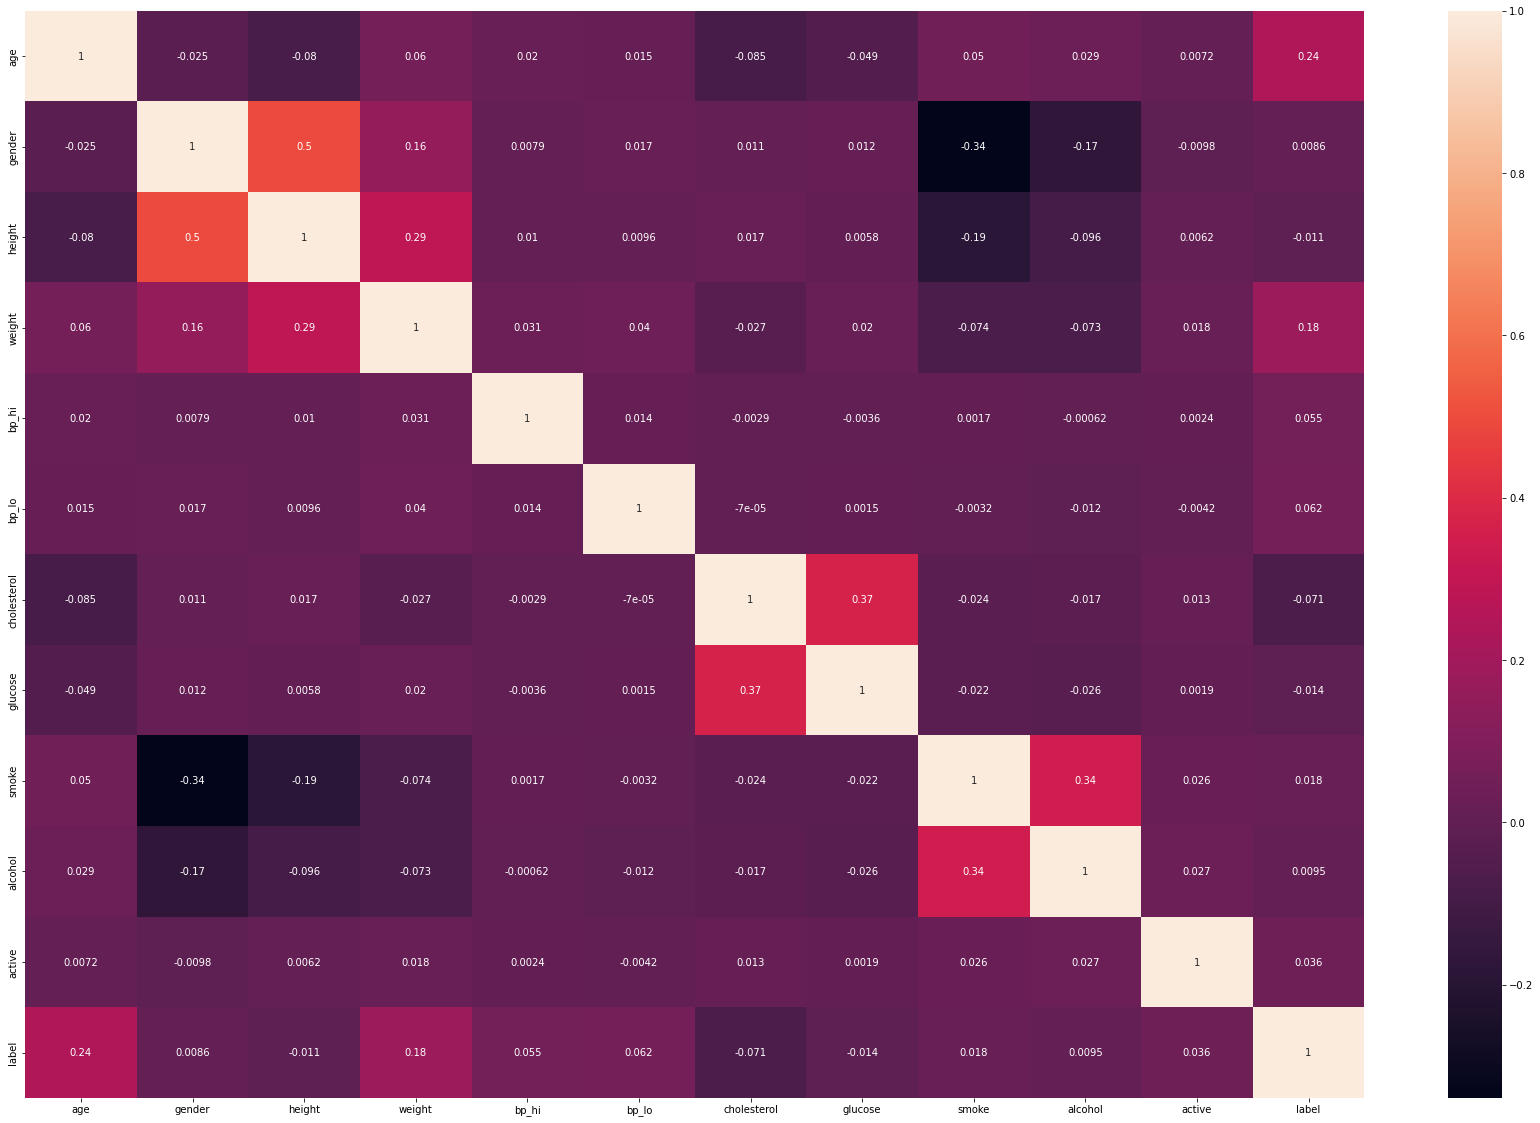

In [54]:
# correlation coeeficient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# correlation matrix
cor = X_train.corr()

# plotting heatmap
plt.figure(figsize=(30,20))
sns.heatmap(cor,annot=True)

In [153]:
# standardization
#X_scaled = X_train.copy()

#for col in X_scaled.columns :
#    X_scaled[col] = X_scaled[col]  / X_scaled[col].abs().max()

#X_scaled

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,0.898494,0.0,0.640,0.290,0.008115,0.009,1.0,1.0,0.0,0.0,0.0
1,0.864378,0.0,0.660,0.355,0.006866,0.007,1.0,1.0,0.0,0.0,0.0
2,0.986547,1.0,0.640,0.450,0.009363,0.009,1.0,1.0,0.0,0.0,1.0
5,0.922152,0.0,0.660,0.385,0.008739,0.009,0.0,1.0,1.0,0.0,1.0
6,0.825159,0.0,0.644,0.330,0.006866,0.008,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,0.925231,0.0,0.608,0.330,0.004994,0.006,1.0,0.0,0.0,0.0,1.0
59996,0.677266,1.0,0.648,0.365,0.006866,0.008,1.0,1.0,0.0,0.0,1.0
59997,0.886855,0.0,0.652,0.515,0.009988,0.009,1.0,0.0,0.0,0.0,1.0
59998,0.678826,0.0,0.656,0.485,0.006866,0.007,1.0,1.0,0.0,0.0,1.0


In [193]:
# normalization
#X_norm = X_train.copy()

#X_norm  = (X_norm['age']-X_norm['age'].min())/ (X_norm['age'].max() - X_norm['age'].min())

#X_norm 

0        0.813628
1        0.750987
2        0.975300
5        0.857065
6        0.678978
           ...   
59995    0.862718
59996    0.407433
59997    0.792257
59998    0.410298
59999    0.703833
Name: age, Length: 48667, dtype: float64

In [205]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [123]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=800, max_depth=10, min_samples_split= 5)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=800)

In [208]:
from sklearn.svm import SVC  
svm = SVC(kernel='linear') 
svm.fit(X_train,y_train)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [155]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [109]:
# build the lightgbm model
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(learning_rate=0.01,num_iterations = 500, objective='binary')
lgbm.fit(X_train, y_train)

c:\Users\user\anaconda3\envs\ailab\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMClassifier(learning_rate=0.001, num_iterations=500, objective='binary')

### Testing

In [63]:
X_test = pd.read_csv(r'D:\Year3\Computer Intelligence\test.csv')
df_backup_test = X_test.copy()
X_test

,id,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,1,22435,Male,171,89,120.0,80.0,normal,normal,Yes,No,Yes
1,2,18184,Female,157,56,140.0,80.0,normal,normal,No,No,Yes
2,3,20626,Male,174,55,120.0,80.0,good,normal,Yes,Yes,Yes
3,4,19198,Female,165,69,NaN,80.0,normal,normal,No,No,No
4,5,14549,Male,163,80,NaN,80.0,normal,normal,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,16155,Female,162,67,130.0,90.0,normal,good,No,Yes,Yes
9996,9997,18006,Female,163,68,120.0,80.0,normal,normal,No,No,Yes
9997,9998,19143,Female,164,64,130.0,90.0,good,normal,No,No,Yes
9998,9999,20619,Female,159,67,150.0,100.0,good,good,No,No,No


In [64]:
# check for null values
X_test.isnull().sum()

id                0
age               0
gender            0
height            0
weight            0
bp_hi          1003
bp_lo           973
cholesterol       0
glucose           0
smoke             0
alcohol           0
active            0
dtype: int64

In [65]:
## replace null with 0 
X_test = X_test.fillna(0)
X_test.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
bp_hi          0
bp_lo          0
cholesterol    0
glucose        0
smoke          0
alcohol        0
active         0
dtype: int64

In [66]:
# drop columns
X_test.drop(['id'], axis=1, inplace=True)
X_test

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,22435,Male,171,89,120.0,80.0,normal,normal,Yes,No,Yes
1,18184,Female,157,56,140.0,80.0,normal,normal,No,No,Yes
2,20626,Male,174,55,120.0,80.0,good,normal,Yes,Yes,Yes
3,19198,Female,165,69,0.0,80.0,normal,normal,No,No,No
4,14549,Male,163,80,0.0,80.0,normal,normal,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9995,16155,Female,162,67,130.0,90.0,normal,good,No,Yes,Yes
9996,18006,Female,163,68,120.0,80.0,normal,normal,No,No,Yes
9997,19143,Female,164,64,130.0,90.0,good,normal,No,No,Yes
9998,20619,Female,159,67,150.0,100.0,good,good,No,No,No


In [67]:
# convert categorical to numeric 
def convertData(dataframe):
    # get column names
    col_names = dataframe.columns.values
    # call each column
    for col in col_names :
        # dictionary
        cat_to_num = {}

        # function to convert all categorical in each column to numbers
        def catToNum(val):
            return cat_to_num[val]

        if dataframe[col].dtype != np.int64 and dataframe[col].dtype != np.float64 :
            # list out all the lements in the columns
            col_contents = dataframe[col].values.tolist()
            # use set cause it does not allow duplicataion of items
            items_set = set(col_contents)
            j = 0
            for i in items_set :
                if i not in cat_to_num:
                    cat_to_num[i] = j
                    j = j + 1

            # iterates all rows and apply the function 
            dataframe[col] = list(map(catToNum, dataframe[col]))

    return dataframe

X_test = convertData(X_test)

In [68]:
X_test

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,22435,1,171,89,120.0,80.0,1,1,0,1,0
1,18184,0,157,56,140.0,80.0,1,1,1,1,0
2,20626,1,174,55,120.0,80.0,2,1,0,0,0
3,19198,0,165,69,0.0,80.0,1,1,1,1,1
4,14549,1,163,80,0.0,80.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,16155,0,162,67,130.0,90.0,1,2,1,0,0
9996,18006,0,163,68,120.0,80.0,1,1,1,1,0
9997,19143,0,164,64,130.0,90.0,2,1,1,1,0
9998,20619,0,159,67,150.0,100.0,2,2,1,1,1


In [201]:
# standardization
# X_test_scaled = X_test.copy()

#for col in X_test_scaled.columns :
#    X_test_scaled[col] = X_test_scaled[col]  / X_test_scaled[col].abs().max()

# X_test_scaled

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,0.947544,1.0,0.855,0.494444,0.074074,0.014035,1.0,1.0,1.0,0.0,1.0
1,0.768003,0.0,0.785,0.311111,0.086420,0.014035,1.0,1.0,0.0,0.0,1.0
2,0.871141,1.0,0.870,0.305556,0.074074,0.014035,0.0,1.0,1.0,1.0,1.0
3,0.810829,0.0,0.825,0.383333,0.000000,0.014035,1.0,1.0,0.0,0.0,0.0
4,0.614478,1.0,0.815,0.444444,0.000000,0.014035,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.682308,0.0,0.810,0.372222,0.080247,0.015789,1.0,0.5,0.0,1.0,1.0
9996,0.760485,0.0,0.815,0.377778,0.074074,0.014035,1.0,1.0,0.0,0.0,1.0
9997,0.808506,0.0,0.820,0.355556,0.080247,0.015789,0.0,1.0,0.0,0.0,1.0
9998,0.870845,0.0,0.795,0.372222,0.092593,0.017544,0.0,0.5,0.0,0.0,0.0


In [178]:
# normalization
#X_test_norm = X_test.copy()

# X_test_norm  = (X_test_norm-X_test_norm.min())/ (X_test_norm.max() - X_test_norm.min())

# X_test_norm 

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,glucose,smoke,alcohol,active
0,0.867591,1.0,0.786765,0.393333,0.074074,0.014035,1.0,1.0,1.0,0.0,1.0
1,0.414392,0.0,0.683824,0.173333,0.086420,0.014035,1.0,1.0,0.0,0.0,1.0
2,0.674733,1.0,0.808824,0.166667,0.074074,0.014035,0.0,1.0,1.0,1.0,1.0
3,0.522495,0.0,0.742647,0.260000,0.000000,0.014035,1.0,1.0,0.0,0.0,0.0
4,0.026866,1.0,0.727941,0.333333,0.000000,0.014035,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.198081,0.0,0.720588,0.246667,0.080247,0.015789,1.0,0.5,0.0,1.0,1.0
9996,0.395416,0.0,0.727941,0.253333,0.074074,0.014035,1.0,1.0,0.0,0.0,1.0
9997,0.516631,0.0,0.735294,0.226667,0.080247,0.015789,0.0,1.0,0.0,0.0,1.0
9998,0.673987,0.0,0.698529,0.246667,0.092593,0.017544,0.0,0.5,0.0,0.0,0.0


In [206]:
# logistic regression
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [124]:
# random forest
y_pred=rf.predict(X_test)

In [59]:
# svm
y_pred=svm.predict(X_test)

In [92]:
# knn
y_pred=knn.predict(X_test)

In [156]:
# decision tree
y_pred = clf_en.predict(X_test)

In [110]:
# lgbm
y_pred = lgbm.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [125]:
# code to generate prediction file
ID = '111'
id = np.arange(1, 10001)
d = {'id': id, 'label': y_pred}
df = pd.DataFrame(data=d)
df.to_csv(ID+".csv", index=False)